# STAT306 Final Project - Exploring main effective variables of life expectancy 
#### By Noora Zhou

## Introduction

The average life expectancy of a population is the average number of years a person born during the same period is expected to continue living, holding current mortality rates at different ages constant. Comparative analysis of life expectancy per capita reflects the quality of life in a society, measures the health status of the people in a country (or region), and provides important data for insurance companies dealing with life insurance.

Life expectancy is both one of the most important indicators of the health status of the population and a comprehensive indicator of the level of economic and social development of a country or region. Indicators such as life expectancy are one of the most fundamental research elements for evaluating and predicting the quality of the population, measuring the burden of disease, and evaluating the national economy and the quality of life of the population.

The analysis of the main influencing variables of life expectancy can be of great help in the prediction of life expectancy.

## Data Description

The publicly available dataset provides data for 193 countries spanning from year 2000 to year 2015 and is structured in 2938 rows (data points) which are characterized into a total of 22 columns (features)[here](https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who). The features can be categorized into two groups:

Health factors which are originally provided by the Global Health Observatory (GHO) data repository under the World Health Organization (WHO).
Economic factors which have been collected by the United Nation (UN) website.

The variables used in this report are:

- `Country`: Country name
- `Year`: Year of the date
- `Status`: Country status of developed or developing
- `Adult_Mortality`: Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)
- `Life_expectancy`: Life_Expectancy in age
- `infant.deaths`:Number of Infant Deaths per 1000 population
- `Alcohol`: Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)
- `percentage.expenditure`: Expenditure on health as a percentage of Gross Domestic Product per capita(%)
- `Hepatitis.B`: Hepatitis B (HepB) immunization coverage among 1-year-olds (%)
- `Measles`: number of reported cases per 1000 population
- `BMI`: Average Body Mass Index of entire population
- `under.five.deaths`: Number of under-five deaths per 1000 population
- `Polio`: Polio (Pol3) immunization coverage among 1-year-olds (%)
- `Total.expenditure`: General government expenditure on health as a percentage of total government expenditure (%)
- `Diphtheria`: Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)room)
- `HIV.AIDS`: Deaths per 1 000 live births HIV/AIDS (0-4 years)
- `GDP`: Gross Domestic Product per capita (in USD)
- `Population`: Population of the country
- `thinness..1.19.years`: Prevalence of thinness among children and adolescents for Age 10 to 19 (% )
- `thinness.5.9.years`: Prevalence of thinness among children for Age 5 to 9(%)
- `Income.composition.of.resources`: Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
- `Schooling`: Number of years of Schooling(years)

## Set up

In [1]:
install.packages('ggcorrplot')
install.packages('leaps')

Installing package into ‘/home/jupyter/R/x86_64-pc-linux-gnu-library/4.1’
(as ‘lib’ is unspecified)

Installing package into ‘/home/jupyter/R/x86_64-pc-linux-gnu-library/4.1’
(as ‘lib’ is unspecified)



In [2]:
library(ggplot2)
library(ggcorrplot)
library(tidyverse)
library(car)
library(leaps) 
library(broom)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ tibble  3.1.8     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.1
✔ readr   2.1.2     ✔ forcats 0.5.2
✔ purrr   0.3.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some




In [3]:
set_plot_dimensions <- function(width_choice , height_choice) {
options(repr.plot.width=width_choice, repr.plot.height=height_choice)
}


In [4]:
life_ep <- read.csv("Life Expectancy Data.csv")
life_ep <- life_ep %>% drop_na()       #data cleaning
head(life_ep)

,Country,Year,Status,Life.expectancy,Adult.Mortality,infant.deaths,Alcohol,percentage.expenditure,Hepatitis.B,Measles,⋯,Polio,Total.expenditure,Diphtheria,HIV.AIDS,GDP,Population,thinness..1.19.years,thinness.5.9.years,Income.composition.of.resources,Schooling
,<chr>,<int>,<chr>,<dbl>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,⋯,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Afghanistan,2015,Developing,65.0,263,62,0.01,71.279624,65,1154,⋯,6,8.16,65,0.1,584.25921,33736494,17.2,17.3,0.479,10.1
2,Afghanistan,2014,Developing,59.9,271,64,0.01,73.523582,62,492,⋯,58,8.18,62,0.1,612.69651,327582,17.5,17.5,0.476,10.0
3,Afghanistan,2013,Developing,59.9,268,66,0.01,73.219243,64,430,⋯,62,8.13,64,0.1,631.74498,31731688,17.7,17.7,0.470,9.9
4,Afghanistan,2012,Developing,59.5,272,69,0.01,78.184215,67,2787,⋯,67,8.52,67,0.1,669.95900,3696958,17.9,18.0,0.463,9.8
5,Afghanistan,2011,Developing,59.2,275,71,0.01,7.097109,68,3013,⋯,68,7.87,68,0.1,63.53723,2978599,18.2,18.2,0.454,9.5
6,Afghanistan,2010,Developing,58.8,279,74,0.01,79.679367,66,1989,⋯,66,9.20,66,0.1,553.32894,2883167,18.4,18.4,0.448,9.2


## Data Selection

In [5]:
#Year and country columns were removed because they were not relevant to the main question of the analysis.
life_ep <- subset(life_ep, select = -c(Country, Year))
life_ep

,Status,Life.expectancy,Adult.Mortality,infant.deaths,Alcohol,percentage.expenditure,Hepatitis.B,Measles,BMI,under.five.deaths,Polio,Total.expenditure,Diphtheria,HIV.AIDS,GDP,Population,thinness..1.19.years,thinness.5.9.years,Income.composition.of.resources,Schooling
,<chr>,<dbl>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Developing,65.0,263,62,0.01,71.279624,65,1154,19.1,83,6,8.16,65,0.1,584.25921,33736494,17.2,17.3,0.479,10.1
2,Developing,59.9,271,64,0.01,73.523582,62,492,18.6,86,58,8.18,62,0.1,612.69651,327582,17.5,17.5,0.476,10.0
3,Developing,59.9,268,66,0.01,73.219243,64,430,18.1,89,62,8.13,64,0.1,631.74498,31731688,17.7,17.7,0.470,9.9
4,Developing,59.5,272,69,0.01,78.184215,67,2787,17.6,93,67,8.52,67,0.1,669.95900,3696958,17.9,18.0,0.463,9.8
5,Developing,59.2,275,71,0.01,7.097109,68,3013,17.2,97,68,7.87,68,0.1,63.53723,2978599,18.2,18.2,0.454,9.5
6,Developing,58.8,279,74,0.01,79.679367,66,1989,16.7,102,66,9.20,66,0.1,553.32894,2883167,18.4,18.4,0.448,9.2
7,Developing,58.6,281,77,0.01,56.762217,63,2861,16.2,106,63,9.42,63,0.1,445.89330,284331,18.6,18.7,0.434,8.9
8,Developing,58.1,287,80,0.03,25.873925,64,1599,15.7,110,64,8.33,64,0.1,373.36112,2729431,18.8,18.9,0.433,8.7
9,Developing,57.5,295,82,0.02,10.910156,63,1141,15.2,113,63,6.73,63,0.1,369.83580,26616792,19.0,19.1,0.415,8.4


## Data Analyse

The variable `Life.expectancy` is our response variable.
Before building a model, we would like to check for any multicolinearity and drop columns with high correlations. To do so, we will fit a full linear model on all of the variables and check the VIF values.

In [6]:
full_model <- lm(Life.expectancy~., data = life_ep)
tidy(full_model) %>% mutate_if(is.numeric, round, digits=2)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),54.45,0.84,64.82,0.00
StatusDeveloping,-0.97,0.34,-2.87,0.00
Adult.Mortality,-0.02,0.00,-17.52,0.00
infant.deaths,0.09,0.01,8.78,0.00
Alcohol,-0.09,0.03,-2.76,0.01
percentage.expenditure,0.00,0.00,2.04,0.04
Hepatitis.B,-0.01,0.00,-1.47,0.14
Measles,0.00,0.00,-0.73,0.47
BMI,0.03,0.01,5.63,0.00


In [7]:
vif(full_model)

Status                 Adult.Mortality 
                       1.831846                        1.812128 
                  infant.deaths                         Alcohol 
                     212.186280                        2.285766 
         percentage.expenditure                     Hepatitis.B 
                      12.852460                        1.660937 
                        Measles                             BMI 
                       1.515011                        1.797323 
              under.five.deaths                           Polio 
                     202.005452                        1.712697 
              Total.expenditure                      Diphtheria 
                       1.119812                        2.094827 
                       HIV.AIDS                             GDP 
                       1.483088                       13.570172 
                     Population            thinness..1.19.years 
                       1.943578                        7.607113 
             thinness.5.9.years Income.composition.of.resources 
                       7.588073                        2.971519 
                      Schooling 
                       3.530048

#### Drop the variables with very high VIF values.

In [8]:
life_ep <- life_ep %>% select(-infant.deaths, -percentage.expenditure, -under.five.deaths, -GDP)
full_2 <- lm(Life.expectancy~., data = life_ep)
tidy(full_2) %>% mutate_if(is.numeric, round, digits=2)
vif(full_2)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),53.42,0.86,62.10,0.00
StatusDeveloping,-1.55,0.34,-4.54,0.00
Adult.Mortality,-0.02,0.00,-18.28,0.00
Alcohol,-0.13,0.03,-3.96,0.00
Hepatitis.B,-0.01,0.00,-1.91,0.06
Measles,0.00,0.00,0.12,0.91
BMI,0.03,0.01,5.52,0.00
Polio,0.01,0.01,2.00,0.05
Total.expenditure,0.09,0.04,2.11,0.04


Status                 Adult.Mortality 
                       1.719351                        1.778711 
                        Alcohol                     Hepatitis.B 
                       2.181050                        1.632446 
                        Measles                             BMI 
                       1.158800                        1.791546 
                          Polio               Total.expenditure 
                       1.702552                        1.112415 
                     Diphtheria                        HIV.AIDS 
                       2.068882                        1.480614 
                     Population            thinness..1.19.years 
                       1.237679                        7.549168 
             thinness.5.9.years Income.composition.of.resources 
                       7.469352                        2.914472 
                      Schooling 
                       3.442037

### Categorical variables:

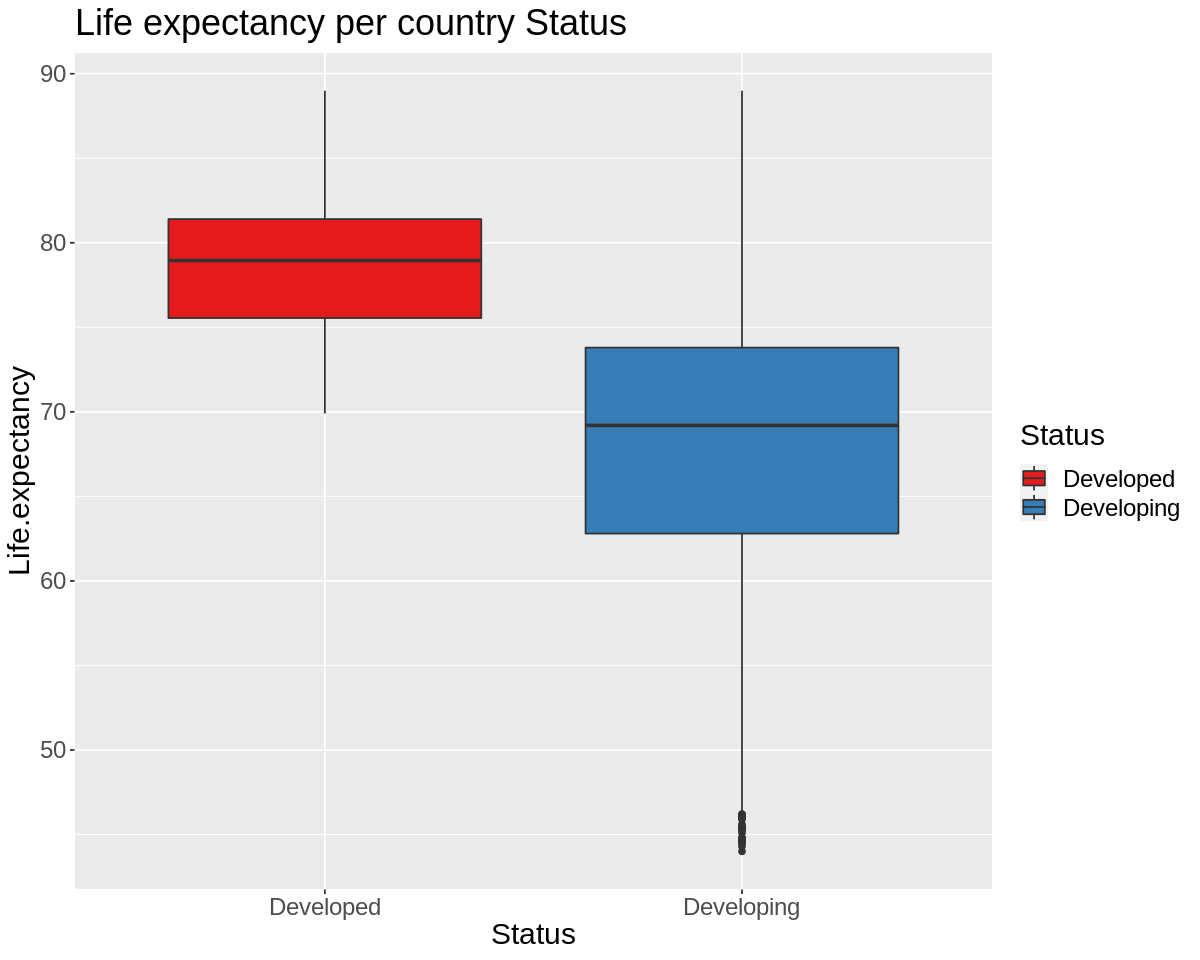

In [10]:
set_plot_dimensions(10,8)
ggplot(life_ep ,aes(x= Status,y=Life.expectancy, fill= Status)) + 
        geom_boxplot() +
        ggtitle("Life expectancy per country Status")+
        theme(text = element_text(size = 18))+
        scale_fill_brewer(palette="Set1")

The median of the life expectancy of the developed countries is larger than that of developing countries. The variance of developing countries is wider tahn that of the developed countries. There are are some outliers in developing countries.

### Continuous variables:

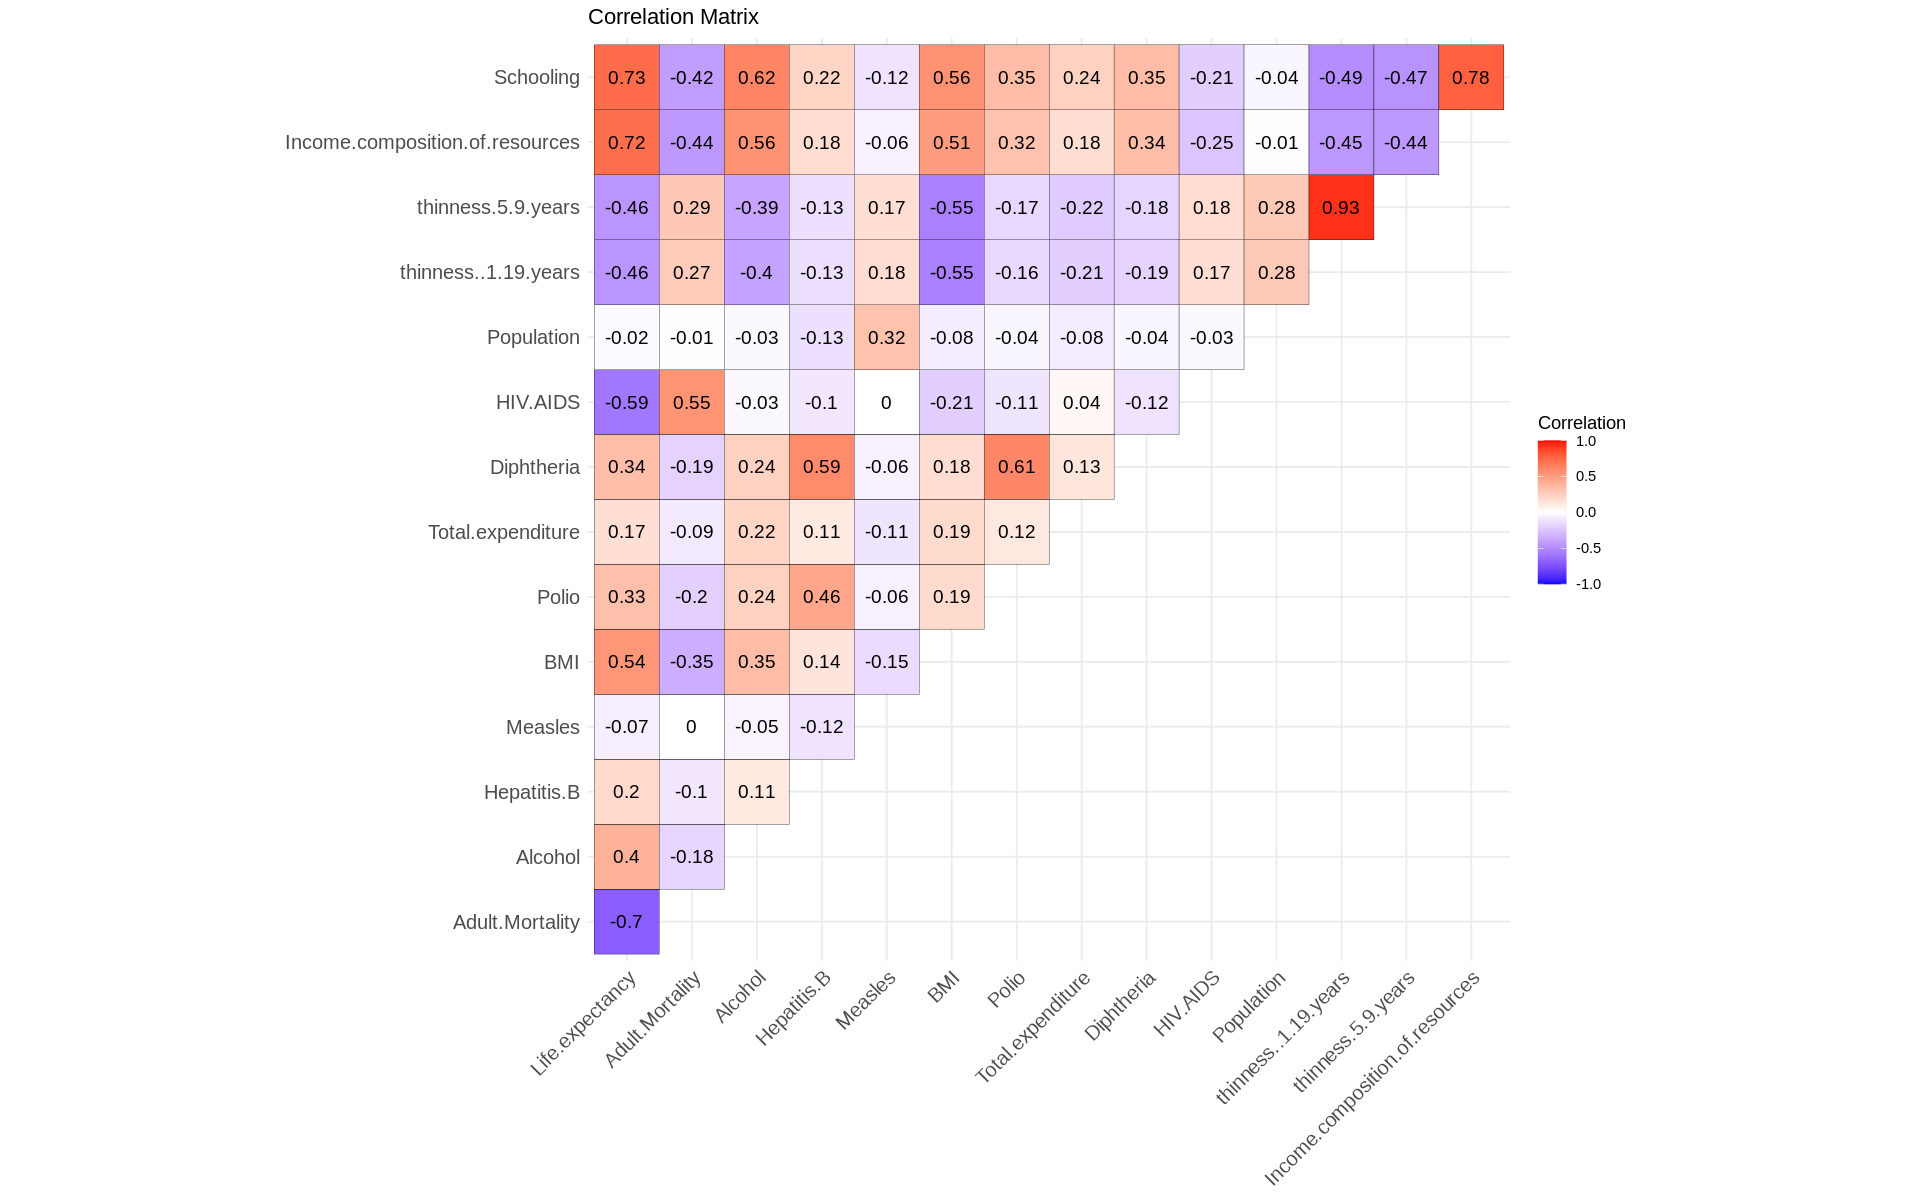

In [11]:
set_plot_dimensions(16,10)
corr <- round(cor(subset(life_ep, select =-c(Status))), 3)
ggcorrplot(corr,type = "upper", lab = TRUE, outline.color = "black", lab_size = 4, legend.title = "Correlation")+
ggtitle("Correlation Matrix")

We can notice very strong correlation[>= 0.9] between thinness..1.19.years and thinness.5.9.years.

So one of them will be omitted based on value of VIF then we check VIFs again. 
Then I choose to omit thinness..1.19.years as it has a higher VIF.

In [12]:
life_ep <- life_ep %>% select(-thinness..1.19.years)

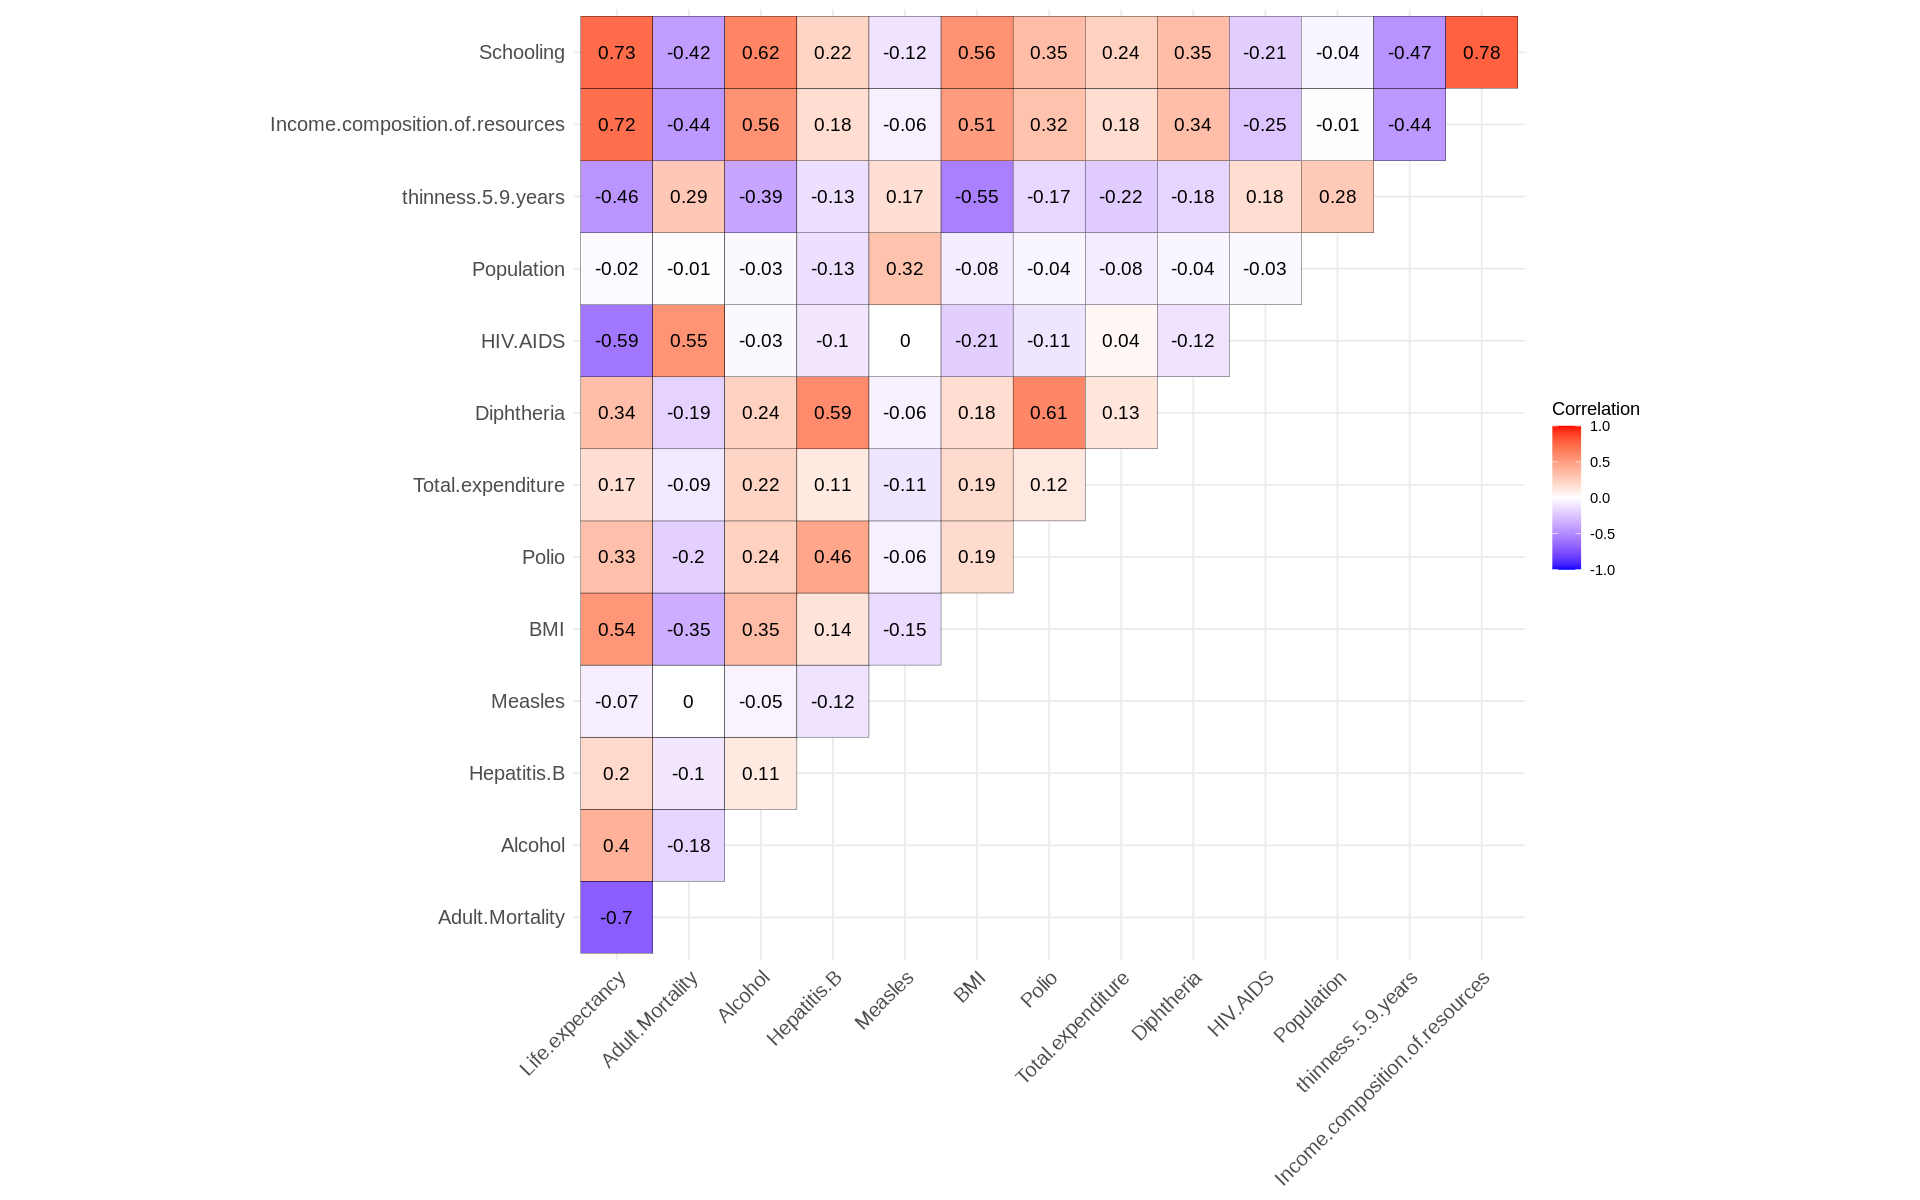

In [13]:
set_plot_dimensions(16,10)
corr <- round(cor(subset(life_ep, select =-c(Status))), 3)
ggcorrplot(corr,type = "upper", lab = TRUE, outline.color = "black", lab_size = 4, legend.title = "Correlation")

The correlation matrix now shows no suspicious coeffecients that might indicate collinearity between the features.

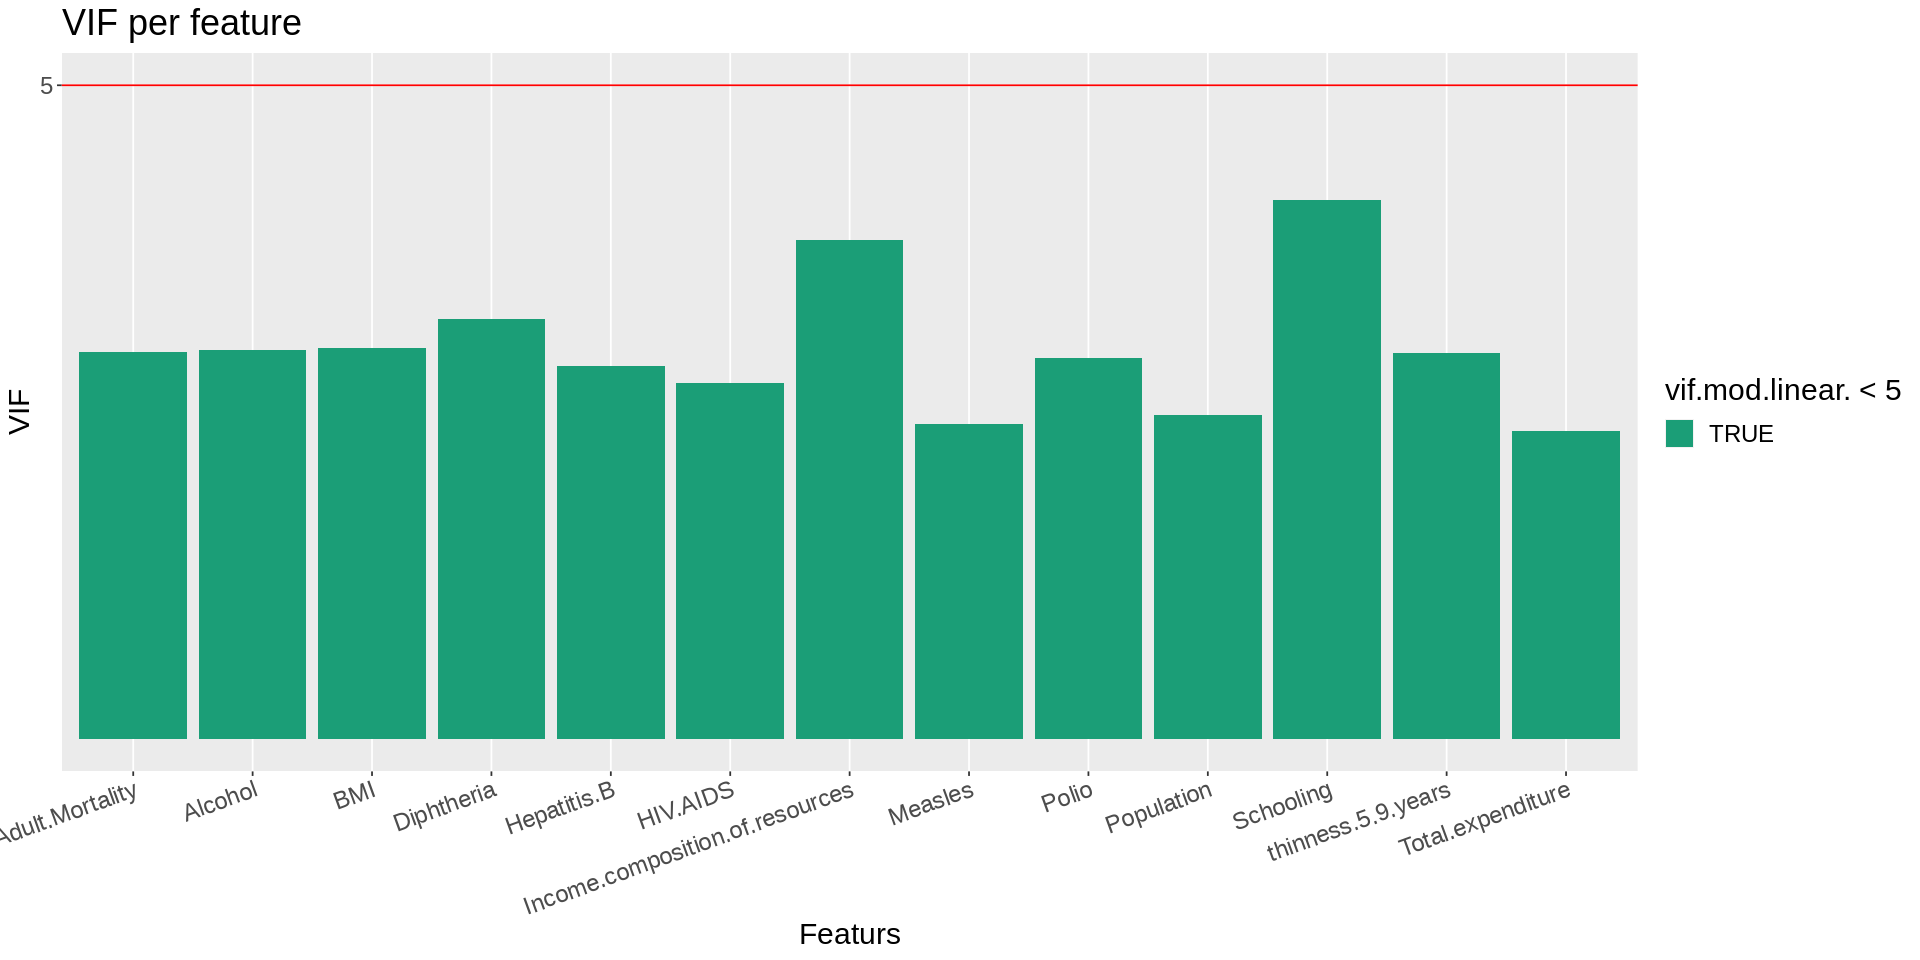

In [14]:
mod.linear <- lm(Life.expectancy~ ., data = subset(life_ep, select =-c(Status)))
vifs <- data.frame(vif(mod.linear))

set_plot_dimensions(16,8)
ggplot(vifs, aes(y=vif.mod.linear., x=row.names(vifs))) + 
    geom_bar(aes(fill=vif.mod.linear.<5),stat="identity")+
    scale_y_continuous(trans = "sqrt",  breaks = c(5, 10, 50, 100))+
    geom_hline(yintercept = 5, colour = "red") + 
    ggtitle("VIF per feature") +
    xlab("Featurs") + ylab("VIF") +
    theme(axis.text.x=element_text(angle=20, hjust=1))+
    theme(text = element_text(size = 18))+
    scale_fill_brewer(palette="Dark2")

We can notice that VIFs are within an acceptable range and they are below 5.

In [15]:
full_3 <- lm(Life.expectancy~., data = life_ep)

In [16]:
summary(full_3)


Call:
lm(formula = Life.expectancy ~ ., data = life_ep)

Residuals:
     Min       1Q   Median       3Q      Max 
-16.8843  -2.2163   0.0432   2.3288  10.9709 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      5.334e+01  8.516e-01  62.642  < 2e-16 ***
StatusDeveloping                -1.541e+00  3.403e-01  -4.528 6.38e-06 ***
Adult.Mortality                 -1.787e-02  9.777e-04 -18.277  < 2e-16 ***
Alcohol                         -1.321e-01  3.363e-02  -3.929 8.88e-05 ***
Hepatitis.B                     -8.819e-03  4.585e-03  -1.923 0.054623 .  
Measles                          1.010e-06  9.808e-06   0.103 0.917997    
BMI                              3.459e-02  6.219e-03   5.562 3.12e-08 ***
Polio                            1.050e-02  5.333e-03   1.970 0.049037 *  
Total.expenditure                8.858e-02  4.215e-02   2.101 0.035770 *  
Diphtheria                       2.196e-02  6.122e-03   3.586 0.000345 ***

## Models

In order to build an unbiased model from the variables in full_3, we split the data into 2 equally sized sections. One section will be used to select the variables, and the other section will be used to fit the model.

In [17]:
set.seed(1234)
dt <- sample.int(nrow(life_ep), nrow(life_ep) / 2)
sec1 <- life_ep[dt,]
sec2 <- life_ep[-dt,]

We will use forward selection in `sec1` to choose the variables to use in our model. The below code shows the variables selected by the algorithm for each number of variables to include in the model.

In [18]:
forward_model <- regsubsets(
  x = Life.expectancy ~.,
  nvmax = 14,
  data =  sec1,
  method = "forward",
)

summary <- summary(forward_model)
summary$which

,(Intercept),StatusDeveloping,Adult.Mortality,Alcohol,Hepatitis.B,Measles,BMI,Polio,Total.expenditure,Diphtheria,HIV.AIDS,Population,thinness.5.9.years,Income.composition.of.resources,Schooling
1,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE
2,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE
3,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE
4,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,TRUE,TRUE
5,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE,FALSE,TRUE,TRUE
6,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,TRUE,TRUE,FALSE,FALSE,TRUE,TRUE
7,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,TRUE,TRUE,FALSE,FALSE,TRUE,TRUE
8,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,TRUE,TRUE,FALSE,FALSE,TRUE,TRUE
9,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,TRUE,TRUE,FALSE,TRUE,TRUE,TRUE
10,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,TRUE,FALSE,FALSE,TRUE,TRUE,FALSE,TRUE,TRUE,TRUE


In order to select the most appropriate model, we will obtain the relevant statistics for each number of selected variable. We will choose our final model based on criterias such as $Adj. R^2$ and Mallow's Cp.

In [19]:
summary_stats <- tibble(
  n_variables = 1:14,
  r2 = summary$rsq,
  adjr2 = summary$adjr2,
  Cp = summary$cp
)

summary_stats

n_variables,r2,adjr2,Cp
<int>,<dbl>,<dbl>,<dbl>
1,0.5254371,0.5248597,1117.974162
2,0.7217099,0.7210319,318.454352
3,0.7713683,0.7705318,117.664103
4,0.7920784,0.7910630,35.089936
5,0.7953218,0.7940707,23.844981
6,0.7985670,0.7970877,12.592421
7,0.7994173,0.7976966,11.120383
8,0.8002350,0.7982741,9.781138
9,0.8011235,0.7989246,8.152623


Based on the statistics above, we can see that `n_variables == 9` yields the highest $Adj. R^2$ value. Also it yields the lowest Mallow's CP value and it is pretty close to its p. Thus, we will select 9 variables in our final model.


the variables we will choose to include in our final model will be:
 - `Schooling`
 - `HIV.AIDS`
 - `Adult.Mortality`
 - `Income.composition.of.resources` 
 - `Diphtheria`
 - `BMI`
 - `StatusDeveloping`
 - `Alcohol`
 - `thinness.5.9.years`

We will then fit the our inference using the second part of the data (`sec2`) and the variables selected above.

In [24]:
fit_final <- lm(Life.expectancy ~ 
Schooling
+ HIV.AIDS
+ Adult.Mortality
+ Income.composition.of.resources
+ Diphtheria
+ BMI
+ Status
+ Alcohol
+ thinness.5.9.years, data = sec2)

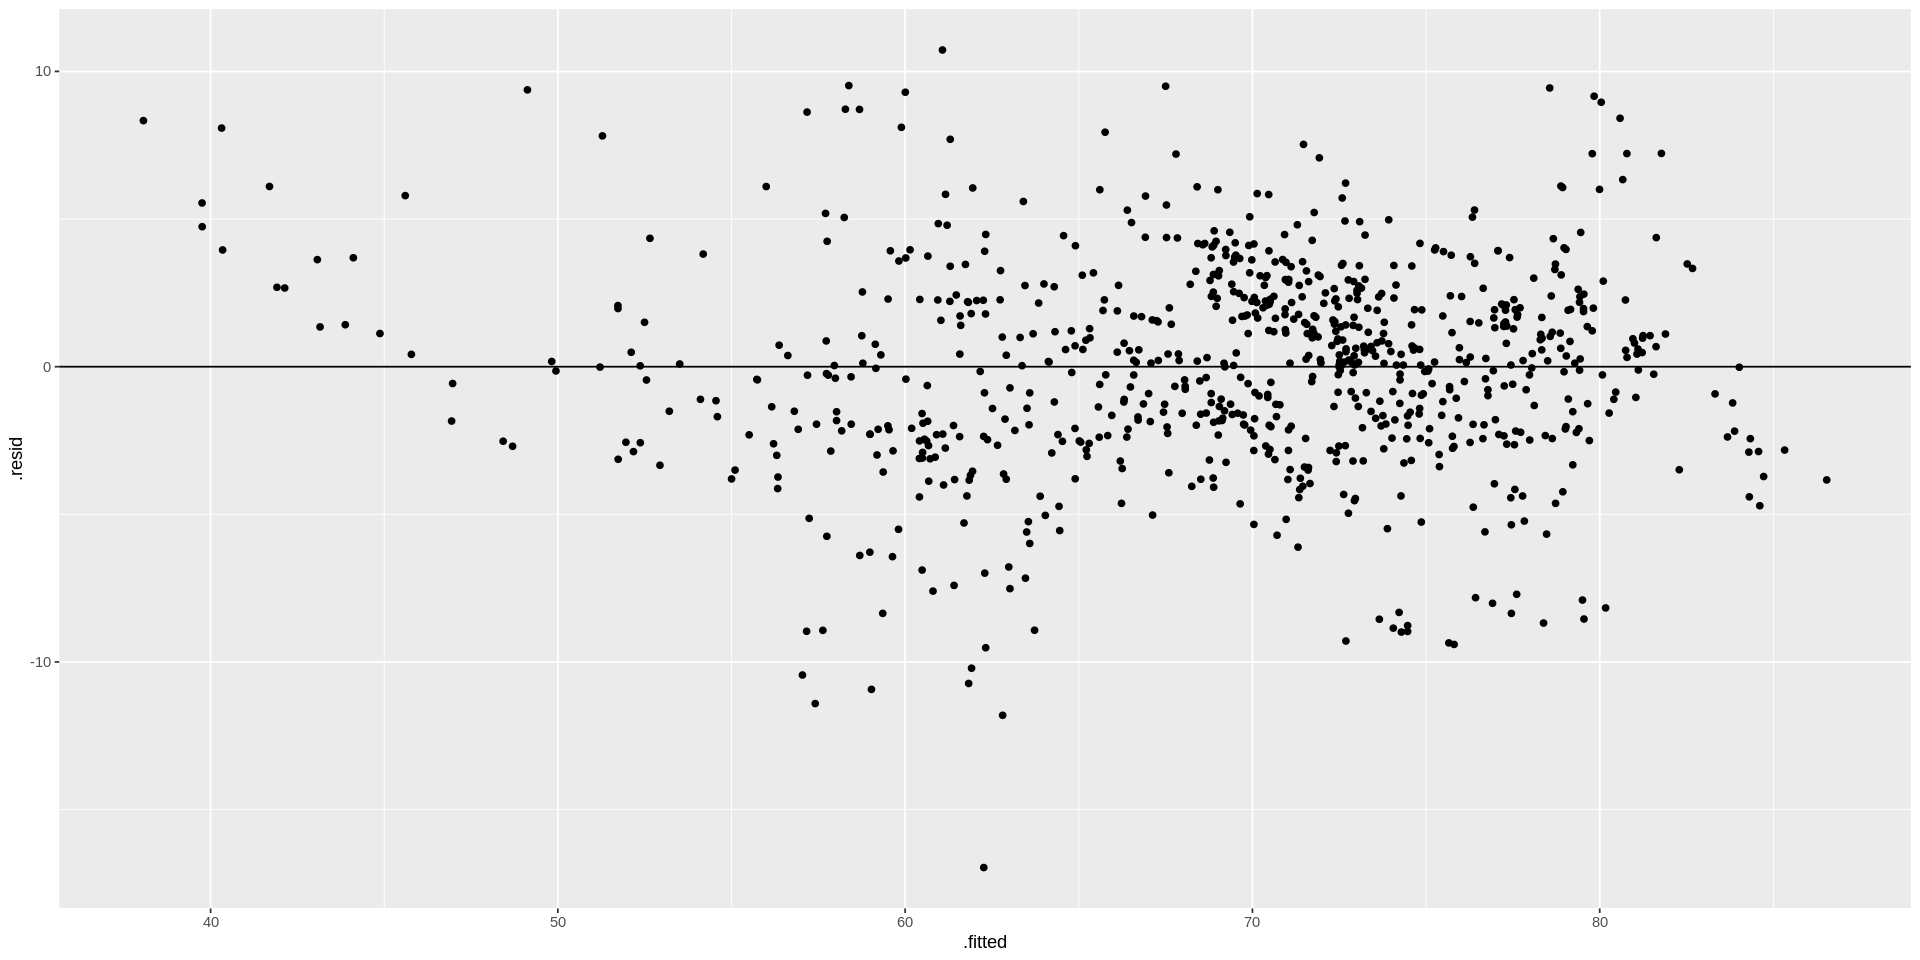

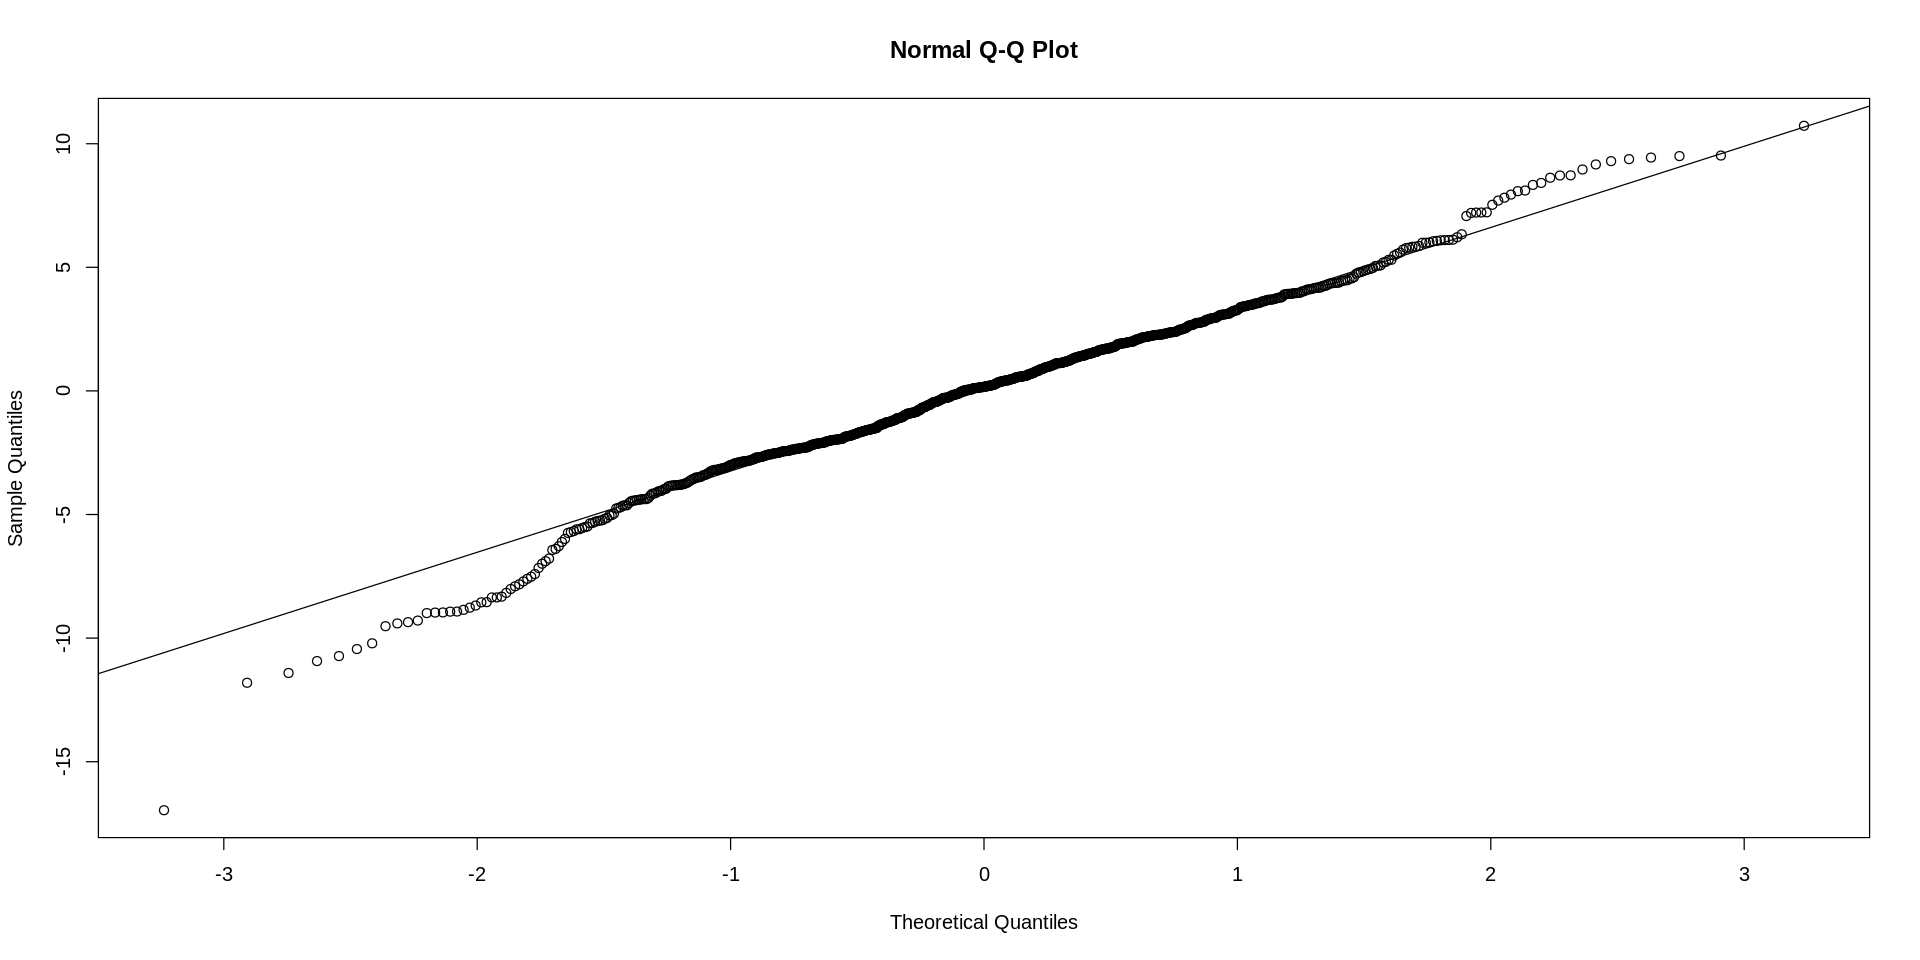

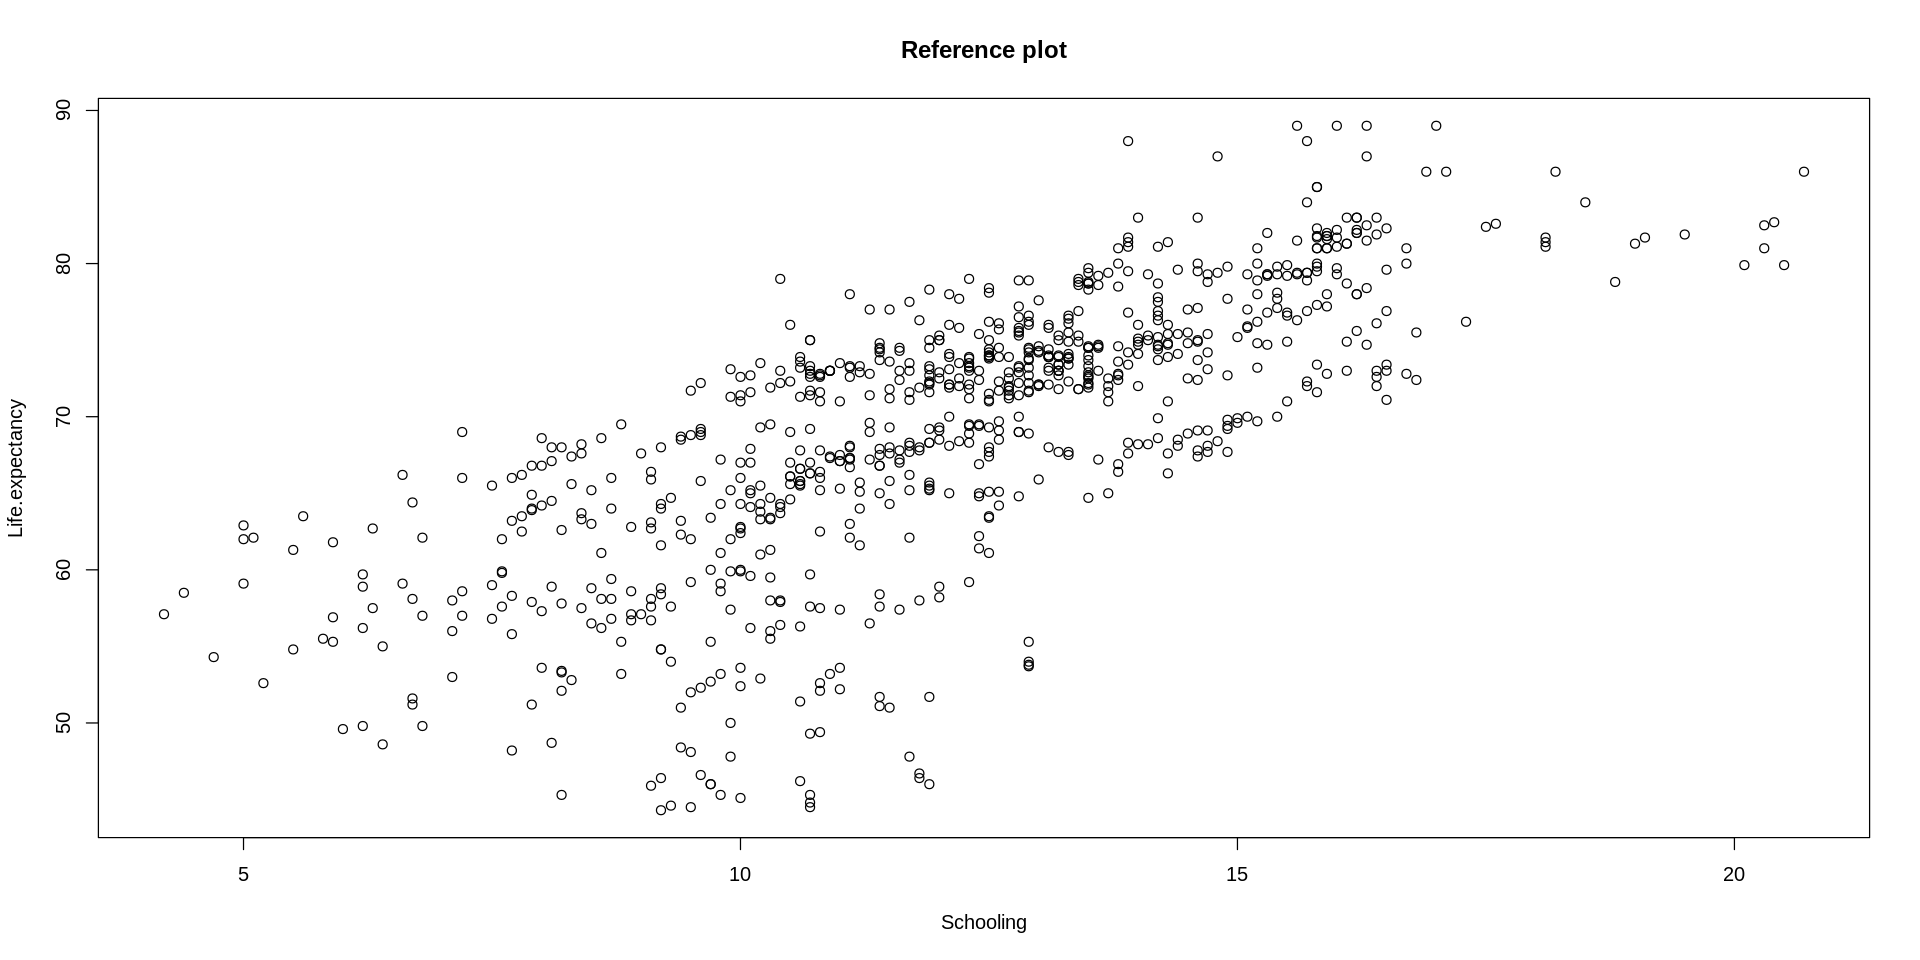

In [25]:
ggplot(fit_final, aes(x = .fitted, y = .resid)) +
  geom_point() +
  geom_hline(yintercept = 0)

qqplot_resid <- qqnorm(resid(fit_final)) 
qqline(resid(fit_final)) 

plot(sec2$Schooling, sec2$Life.expectancy, main ="Reference plot", xlab = "Schooling", ylab = "Life.expectancy")

We can notice that all linear regression assumptions are roughly met:

- The Residuals vs Fitted plot

There is no pattern in the residual plot. we can assume linear relationship between the predictors and the outcome variables. (linearity assumption)

- The Normal Q-Q plot

All the points spread along the reference line equally, it’s good enough to assume that the data has the normality of the residuals.(normality of the residuals assumption)

## Conclusion

According to our analysis, we found the best fit model to be 
$$Y = 53.42 +0.94x_1 - 0.43 x_2 -0.02 x_3 +10.69x_4 + 0.02x_5 + 0.03 x_6 - 1.55 x_7 -0.13x_8 -0.04x_9$$
, where Y is the response variable(life expectancy). 
- $x_1$ = `Schooling`
- $x_2$ = `HIV.AIDS`
- $x_3$ = `Adult.Mortality`
- $x_4$ = `Income.composition.of.resources`
- $x_5$ = `Diphtheria`
- $x_6$ = `BMI`
- $x_7$ = `StatusDeveloping`
- $x_8$ = `Alcohol`
- $x_9$ = `thinness.5.9.years`

This means that schooling, Income composition of resources, BMI and Diphtheria maintain a positive relationship with life expectancy.
Through this analysis, I learned that surprisingly number of years of schooling is the variable to focus on when determining life expectancy. In addition, income composition of resources also has a large impact on life expectancy.

The final model went from 21 predictor variables for the original data to nine predictor variables. adjusted R squared and RMSE were very close, so there was not much loss in removing these variables.

This project has helped me to have a better understanding of life expectancy. To get a more accurate prediction model to predict life expectancy, more possible variables need to be evaluated.